In this notebook we compare our new Jax based simulation for the KS equation with the already existing one. We use the same params as Jonathan, and just iterate until we get the same result.

In [5]:
from KS import KS

import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
import seaborn as sns
sns.set()

In [7]:
%%time
seed = 1
L = 22 / (2 * np.pi)  # length
N = 100  # space discretization step
dt = 0.25  # time discretization step
N_train = 70000
N_test = 5000
N_init = 1000  # remove the initial points
tend = (N_train + N_test) * dt + N_init

np.random.seed(seed)
dns = KS(L=L, N=N, dt=dt, tend=tend)
dns.simulate()

# This line below I don't understand yet; why the sqrt?
u = dns.uu[N_init:] / np.sqrt(N)

CPU times: user 5.18 s, sys: 21.3 ms, total: 5.2 s
Wall time: 5.21 s


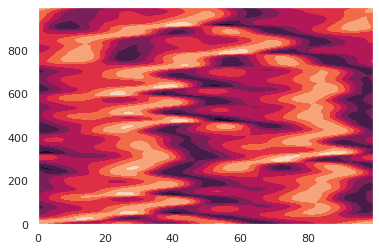

In [13]:
plt.contourf(u[:1000])

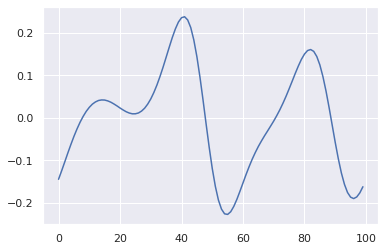

In [11]:
plt.plot(u[100, :])

In [14]:
# First shape is time, second x
print(u.shape)

(78001, 100)


In [17]:
np.save("../../data/KS.npy", u, allow_pickle=False)